## Lyric Sentiment Analysis

In [1]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import nltk

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(df, title_column):
    df['Sentiment'] = df[title_column].apply(lambda x: sia.polarity_scores(x)['compound'])
    return df

df = pd.read_csv('Billboard_Hot100_Songs_Spotify_1946-2022.csv')

df = analyze_sentiment_vader(df, 'Song')

print(df[['Song', 'Sentiment']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zleblanc/nltk_data...


                                   Song  Sentiment
0  Prisoner of Love - Remastered - 1992     0.1779
1                       To Each His Own     0.0000
2                             The Gypsy     0.0000
3                     Five Minutes More     0.0000
4                     Rumors Are Flying     0.0000


  Album Release Date  Year
0         1993-10-25  1993
1         1996-01-01  1996
2         1998-06-16  1998
3         1993-10-08  1993
4         2006-11-30  2006


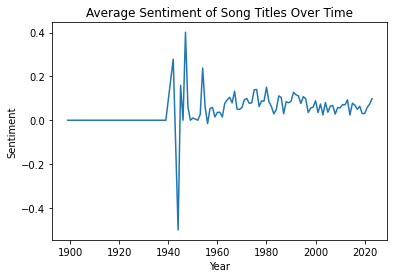

In [2]:

df['Album Release Date'] = pd.to_datetime(df['Album Release Date'], errors='coerce', format='%Y-%m-%d')

df['Album Release Date'] = df['Album Release Date'].fillna(
    pd.to_datetime(df['Album Release Date'], errors='coerce', format='%Y')  # Handle year-only format
)

df['Year'] = df['Album Release Date'].dt.year

print(df[['Album Release Date', 'Year']].head())

sentiment_trend = df.groupby('Year')['Sentiment'].mean()

import matplotlib.pyplot as plt
sentiment_trend.plot(kind='line', title='Average Sentiment of Song Titles Over Time')
plt.xlabel('Year')
plt.ylabel('Sentiment')
plt.show()


## Key & Mode Analysis

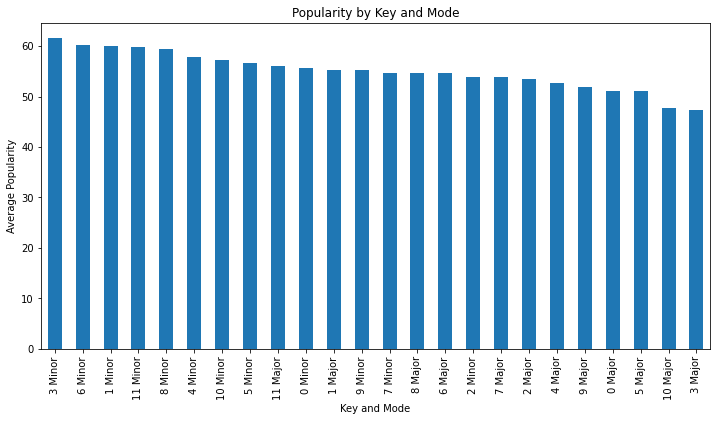

In [3]:

df['Key_Mode'] = df['Key'].astype(str) + ' ' + df['Mode'].map({1: 'Major', 0: 'Minor'})


key_mode_popularity = df.groupby('Key_Mode')['Popularity'].mean().sort_values(ascending=False)

key_mode_popularity.plot(kind='bar', figsize=(12, 6), title='Popularity by Key and Mode')
plt.xlabel('Key and Mode')
plt.ylabel('Average Popularity')
plt.show()



## Release Seasonality

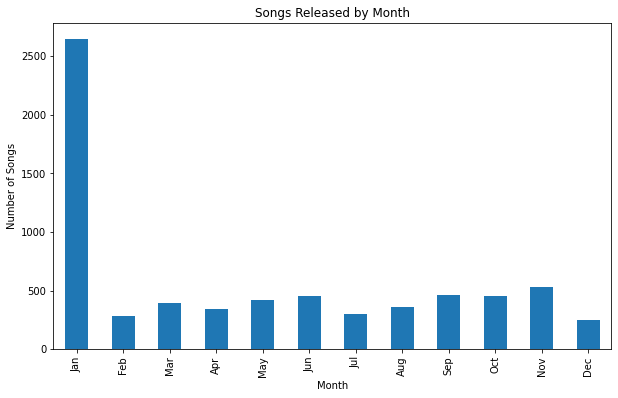

In [4]:
df['Month'] = pd.to_datetime(df['Album Release Date'], errors='coerce').dt.month
month_counts = df['Month'].value_counts().sort_index()


month_counts.plot(kind='bar', figsize=(10, 6), title="Songs Released by Month")
plt.xlabel('Month')
plt.ylabel('Number of Songs')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
